# Project 1
---



### Proposal:

- To analyze the correlation of different health and societal 
makeup measurements across the world's largest countries with mortality rates 
to see which has the strongest impact. We plan to determine if there is a
significant difference across the 10 largest nations between mortality rates of
males and females. We plan to also determine and plot correlation between
mortality rates and national obesity, physicians per 1000 people, and national
population size. 

### Hypotheses:

- We hypothesize that females have a lower mortality rate than males,
that obesity is strongly correlated with mortality rate, that physicians per citizens
is strongly negatively correlated with mortality rate, and that larger nations have
higher mortality rates.

## Setup
--------

In [180]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [181]:
# Import master data file
master_data_df = pd.read_csv("data.csv")
master_data_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# Limit years for cleaned data to 2006-2015
cleaned_data_df = master_data_df [["Country Name", "Indicator Name", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"]]

# Limit countries for cleaned data to 10 largest in the world
cleaned_data_df = cleaned_data_df .loc[(cleaned_data_df ["Country Name"] == "China") |
                     (cleaned_data_df ["Country Name"] == "India") |
                     (cleaned_data_df ["Country Name"] == "United States") |
                     (cleaned_data_df ["Country Name"] == "Indonesia") |
                     (cleaned_data_df ["Country Name"] == "Brazil") |
                     (cleaned_data_df ["Country Name"] == "Pakistan") |
                     (cleaned_data_df ["Country Name"] == "Nigeria") |
                     (cleaned_data_df ["Country Name"] == "Bangladesh") |
                     (cleaned_data_df ["Country Name"] == "Russian Federation") |
                     (cleaned_data_df ["Country Name"] == "Mexico")
                     , :]

# Limit indicators to those relevant for planned analysis
cleaned_data_df = cleaned_data_df .loc[(cleaned_data_df ["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Population, total") |
                     (cleaned_data_df ["Indicator Name"] == "Population, male") |
                     (cleaned_data_df ["Indicator Name"] == "Population, female") |
                     (cleaned_data_df ["Indicator Name"] == "Urban population") |
                     (cleaned_data_df ["Indicator Name"] == "Rural population") |
                     (cleaned_data_df ["Indicator Name"] == "Physicians (per 1,000 people)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight (% of adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight, male (% of male adults)") |
                     (cleaned_data_df ["Indicator Name"] == "Prevalence of overweight, female (% of female adults)")
                     , :]

# Display cleaned dataframe
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
19505,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN


In [183]:
# Sorting dataframe
cleaned_data_df = cleaned_data_df.reset_index(drop=True)
cleaned_data_df.index.name = "Index"
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Index,,,,,,,,,,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN


In [184]:
column_averages = cleaned_data_df[["2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]].mean(axis = 1, skipna = True)
column_averages_df = pd.DataFrame(column_averages)
column_averages_df=column_averages_df.rename(columns = {0:"2006-2015 AVG"})
column_averages_df.index.name = "Index"
column_averages_df.head(1)

,2006-2015 AVG
Index,
0,120.919333


In [185]:
cleaned_data_df = pd.merge(cleaned_data_df,column_averages_df, on = "Index", how = "inner")
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2006-2015 AVG
Index,,,,,,,,,,,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",135.856,131.575,127.94,124.306,120.672,117.038,113.403,110.296,107.188,NaN,120.919333


In [186]:
cleaned_data_df = cleaned_data_df [["Country Name","Indicator Name", "2006-2015 AVG"]]
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
Index,,,
0,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",120.919333


In [187]:
# Calculate Total Average Mortality Rates
countries = cleaned_data_df["Country Name"].unique().astype(str)
country_list = []
total_avg_mort = []
for country in countries:

    country_df = cleaned_data_df.loc[cleaned_data_df["Country Name"] == country, :]
    total_mort = country_df.loc[(country_df["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") | (country_df["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") , "2006-2015 AVG"].sum()
    
    country_list.append(country)
    total_avg_mort.append(total_mort)


In [188]:
# Create Dataframe for Total Average Mortality Rates
total_avg_mort_df = pd.DataFrame({
    "Country Name" : country_list,
    "Indicator Name" : "Mortality Rate, Total",
    "2006-2015 AVG" : total_avg_mort,
    })
total_avg_mort_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [189]:
# Combine cleaned_data_df and total_avg_mort_df
cleaned_data_df = pd.concat([total_avg_mort_df,cleaned_data_df],ignore_index=True)
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [190]:
# Sort data
cleaned_data_df = cleaned_data_df.sort_values(["Country Name", "Indicator Name"], ascending =True)
cleaned_data_df = cleaned_data_df.reset_index(drop=True)
cleaned_data_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [191]:
# Export cleaned data to CSV
cleaned_data_df.to_csv("cleaned_data.csv", index=False)

In [192]:
# Read cleaned data csv
final_cleaned_df = pd.read_csv("cleaned_data.csv")
final_cleaned_df

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",2.800159e+02
1,Bangladesh,"Mortality rate, adult, female (per 1,000 femal...",1.209193e+02
2,Bangladesh,"Mortality rate, adult, male (per 1,000 male ad...",1.590966e+02
3,Bangladesh,"Physicians (per 1,000 people)",3.137500e-01
4,Bangladesh,"Population, female",7.543719e+07
...,...,...,...
115,United States,Prevalence of overweight (% of adults),6.640000e+01
116,United States,"Prevalence of overweight, female (% of female ...",6.170000e+01
117,United States,"Prevalence of overweight, male (% of male adults)",7.120000e+01
118,United States,Rural population,5.935318e+07


## Data Analysis
--------

## Mortality Rate and Sex
--------

In [193]:
#Create dataframe to run visualization on
gender_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Population, female") |
(final_cleaned_df["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)") |
(final_cleaned_df["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)") |
(final_cleaned_df["Indicator Name"] == "Population, male") |
(final_cleaned_df["Indicator Name"] == "Population, total")
,:]
gender_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [194]:
# Create country column
countires =[]
countries = gender_df["Country Name"].unique().astype(str)
sorted_gender_df = pd.DataFrame(countries)
sorted_gender_df=sorted_gender_df.rename(columns = {0:"Country"})
sorted_gender_df.index.name = "Index"
sorted_gender_df.head(1)

,Country
Index,
0,Bangladesh


In [195]:
# Create mortality column
mort_rates = gender_df.loc[gender_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']

mort_rates_df = pd.DataFrame(mort_rates)
mort_rates_df = mort_rates_df.reset_index(drop=True)
mort_rates_df = mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
mort_rates_df.index.name = "Index"
mort_rates_df.head(1)

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889


In [196]:
# Create total population column
total_pop = gender_df.loc[gender_df["Indicator Name"] == "Population, total", '2006-2015 AVG']

total_pop_df = pd.DataFrame(total_pop)
total_pop_df = total_pop_df.reset_index(drop=True)
total_pop_df = total_pop_df.rename(columns = {"2006-2015 AVG":"Average Total Population"})
total_pop_df.index.name = "Index"
total_pop_df.head(1)

,Average Total Population
Index,
0,152710055.9


In [197]:
#Create female average mortality column
female_mort_rates = gender_df.loc[gender_df["Indicator Name"] == "Mortality rate, adult, female (per 1,000 female adults)", '2006-2015 AVG']
female_mort_rates_df = pd.DataFrame(female_mort_rates)
female_mort_rates_df = female_mort_rates_df.reset_index(drop=True)
female_mort_rates_df = female_mort_rates_df.rename(columns = {"2006-2015 AVG":"Female Average Mortality Rate (Per 1,000 Female Adults)"})
female_mort_rates_df.index.name = "Index"
female_mort_rates_df.head(1)

,"Female Average Mortality Rate (Per 1,000 Female Adults)"
Index,
0,120.919333


In [198]:
# Create female population column
female_pop = gender_df.loc[gender_df["Indicator Name"] == "Population, female", '2006-2015 AVG']

female_pop_df = pd.DataFrame(female_pop)
female_pop_df = female_pop_df.reset_index(drop=True)
female_pop_df = female_pop_df.rename(columns = {"2006-2015 AVG":"Average Female Population"})
female_pop_df.index.name = "Index"
female_pop_df.head(1)

,Average Female Population
Index,
0,75437187.5


In [199]:
#Create male average mortality column

male_mort_rates = gender_df.loc[gender_df["Indicator Name"] == "Mortality rate, adult, male (per 1,000 male adults)", '2006-2015 AVG']
male_mort_rates_df = pd.DataFrame(male_mort_rates)
male_mort_rates_df = male_mort_rates_df.reset_index(drop=True)
male_mort_rates_df = male_mort_rates_df.rename(columns = {"2006-2015 AVG":"Male Average Mortality Rate (Per 1,000 Male Adults)"})
male_mort_rates_df.index.name = "Index"
male_mort_rates_df.head(1)

,"Male Average Mortality Rate (Per 1,000 Male Adults)"
Index,
0,159.096556


In [200]:
# Create male population column
male_pop = gender_df.loc[gender_df["Indicator Name"] == "Population, male", '2006-2015 AVG']

male_pop_df = pd.DataFrame(male_pop)
male_pop_df = male_pop_df.reset_index(drop=True)
male_pop_df = male_pop_df.rename(columns = {"2006-2015 AVG":"Average Male Population"})
male_pop_df.index.name = "Index"
male_pop_df.head(1)

,Average Male Population
Index,
0,77272868.4


In [201]:
# Combine colums into sorted_gender_df for Overall Adult Male & Female
sorted_gender_df = pd.merge(sorted_gender_df,female_mort_rates_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,male_mort_rates_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,mort_rates_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,total_pop_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,female_pop_df, on = "Index", how = "inner")
sorted_gender_df = pd.merge(sorted_gender_df,male_pop_df, on = "Index", how = "inner")
sorted_gender_df.head()

,Country,"Female Average Mortality Rate (Per 1,000 Female Adults)","Male Average Mortality Rate (Per 1,000 Male Adults)","Average Mortality Rate (Per 1,000 Adults)",Average Total Population,Average Female Population,Average Male Population
Index,,,,,,,
0,Bangladesh,120.919333,159.096556,280.015889,1.527101e+08,75437187.5,77272868.4
1,Brazil,100.847667,207.242222,308.089889,1.994672e+08,101236236.7,98230956.8
2,China,77.372444,105.304111,182.676556,1.341022e+09,650658233.0,690363767.0
3,India,159.595667,226.463556,386.059222,1.238089e+09,596177211.2,641911521.3
4,Indonesia,154.537111,212.746000,367.283111,2.433133e+08,120783195.5,122530088.7


In [202]:
# Find statistics for Average Mortality Rate (Per 1,000 Adults)
sorted_gender_df.agg({"Average Mortality Rate (Per 1,000 Adults)":["mean","median","var","std","sem"]})

,"Average Mortality Rate (Per 1,000 Adults)"
mean,360.208642
median,323.658000
var,29301.263236
std,171.176118
sem,54.130641


In [203]:
# Find statistics for Female Average Mortality Rate (Per 1,000 Female Adults)
sorted_gender_df.agg({"Female Average Mortality Rate (Per 1,000 Female Adults)":["mean","median","var","std","sem"]})

,"Female Average Mortality Rate (Per 1,000 Female Adults)"
mean,143.598147
median,133.410867
var,6866.719590
std,82.865672
sem,26.204426


In [204]:
# Find statistics for Male Average Mortality Rate (Per 1,000 Male Adults)
sorted_gender_df.agg({"Male Average Mortality Rate (Per 1,000 Male Adults)":["mean","median","var","std","sem"]})

,"Male Average Mortality Rate (Per 1,000 Male Adults)"
mean,216.610495
median,196.657278
var,9941.674773
std,99.707947
sem,31.530421


In [205]:
# Find statistics for Average Total Population
sorted_gender_df.agg({"Average Total Population":["mean","median","var","std","sem"]})

,Average Total Population
mean,4.081664e+08
median,1.858425e+08
var,2.193817e+17
std,4.683820e+08
sem,1.481154e+08


In [206]:
# Find statistics for Average Female Population
sorted_gender_df.agg({"Average Female Population":["mean","median","var","std","sem"]})

,Average Female Population
mean,2.001039e+08
median,9.245394e+07
var,5.069805e+16
std,2.251623e+08
sem,7.120256e+07


In [207]:
# Find statistics for Average Male Population
sorted_gender_df.agg({"Average Male Population":["mean","median","var","std","sem"]})

,Average Male Population
mean,2.080625e+08
median,9.338853e+07
var,5.917043e+16
std,2.432497e+08
sem,7.692232e+07


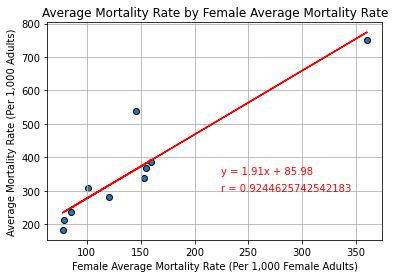

In [251]:
# Plot Average Mortality Rate by Female Average Mortality Rate (Per 1,000 Female Adults)
x_values = sorted_gender_df ["Female Average Mortality Rate (Per 1,000 Female Adults)"]
y_values = sorted_gender_df ["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Female Average Mortality Rate")
plt.xlabel ("Female Average Mortality Rate (Per 1,000 Female Adults)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(225,350),color="red")
plt.annotate(f'r = {rvalue}',(225,300),color="r")

# Save the figure
plt.savefig("output_figs/Female Average Mortality Rate.png")

# Display the figure
plt.show()

#### Analysis:

Goal- This graph is to demonstrate the relationsship of female mortaltiy as it relates to adult deaths.

Findings- We note that there is a postive r-value signifying the female gender deaths increases as the count of adult death increases.

Further Analysis- With the female r-value obtained there is intrest to compare it to ther r value from a male prospective.


-----------------

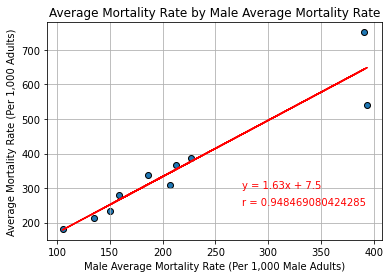

In [253]:
# Plot Average Mortality Rate by Male Average Mortality Rate (Per 1,000 Female Adults)
x_values = sorted_gender_df ["Male Average Mortality Rate (Per 1,000 Male Adults)"]
y_values = sorted_gender_df ["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Male Average Mortality Rate")
plt.xlabel ("Male Average Mortality Rate (Per 1,000 Male Adults)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(275,300),color="red")
plt.annotate(f'r = {rvalue}',(275,250),color="r")

# Save the figure
plt.savefig("output_figs/Male Average Mortality Rate.png")

# Display the figure
plt.show()

#### Analysis:

Goal- This graph is to demonstrate the relationsship of male mortaltiy as it relates to adult deaths.

Findings- We note that there is a postive r-value signifying the male gender deaths increases as the count of adult death increases. Additionally, the r-vale here is lower than the r-value for female presenting that males are dying slower leaving female death occuring more frequently.

Further Analysis-what is it about the male that is causing a reduction in their deaths against females.


-----------------

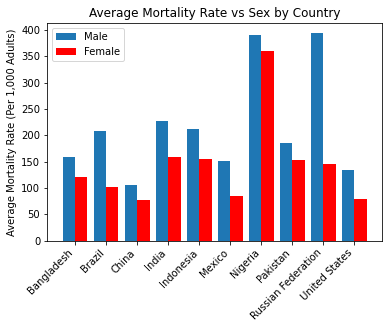

In [210]:
# Plot bar graph of Average Mortality Rate vs Sex by Country
x_values = sorted_gender_df["Country"]
y1_values = sorted_gender_df["Male Average Mortality Rate (Per 1,000 Male Adults)"]
y2_values = sorted_gender_df["Female Average Mortality Rate (Per 1,000 Female Adults)"]
 
X_axis = np.arange(len(x_values))
 
plt.bar(X_axis - 0.2, y1_values, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, y2_values, 0.4, label = 'Female', color="r")
 
plt.xticks(X_axis, x_values,rotation=45, ha="right", va="top")
plt.ylabel("Average Mortality Rate (Per 1,000 Adults)")
plt.title("Average Mortality Rate vs Sex by Country")

plt.legend()

# Save the figure
plt.savefig("output_figs/Average Mortality Rate vs Sex by Country.png")

# Display the figure
plt.show()

#### Analysis:

Goal- This graph is to demonstrate mortality rate of each gender in each county.

Findings- Overall, the country Nigera stands out with the highest mortality rgardless of gender due to the female gender driving the result.

Further Analysis-I conclude it is best to develope a focus in leading Nigera to seek insight to the death causing behaviors/activities being done there that is also appearing in other countries frequently. In this way there may be a solution developed to reduction mortality rate of adults as a whole.


-----------------

## Mortality Rate and Urbanization
--------

In [212]:
# Create dataframe to run visualization on
urban_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Rural population") |
(final_cleaned_df["Indicator Name"] == "Urban population") |
(final_cleaned_df["Indicator Name"] == "Population, total")
,:]
urban_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [213]:
# Create country column
countires =[]
countries = urban_df["Country Name"].unique().astype(str)
sorted_urban_df = pd.DataFrame(countries)
sorted_urban_df=sorted_urban_df.rename(columns = {0:"Country"})
sorted_urban_df.index.name = "Index"
sorted_urban_df.head(1)

,Country
Index,
0,Bangladesh


In [214]:
# Create mortality column
mort_rates = urban_df.loc[urban_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']

mort_rates_df = pd.DataFrame(mort_rates)
mort_rates_df = mort_rates_df.reset_index(drop=True)
mort_rates_df = mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
mort_rates_df.index.name = "Index"
mort_rates_df.head(1)

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889


In [215]:
# Create total population column
total_pop = urban_df.loc[urban_df["Indicator Name"] == "Population, total", '2006-2015 AVG']

total_pop_df = pd.DataFrame(total_pop)
total_pop_df = total_pop_df.reset_index(drop=True)
total_pop_df = total_pop_df.rename(columns = {"2006-2015 AVG":"Average Total Population"})
total_pop_df.index.name = "Index"
total_pop_df.head(1)

,Average Total Population
Index,
0,152710055.9


In [216]:
# Create urban population column
urban_pop = urban_df.loc[urban_df["Indicator Name"] == "Urban population", '2006-2015 AVG']

urban_pop_df = pd.DataFrame(urban_pop)
urban_pop_df = urban_pop_df.reset_index(drop=True)
urban_pop_df = urban_pop_df.rename(columns = {"2006-2015 AVG":"Average Urban Population"})
urban_pop_df.index.name = "Index"
urban_pop_df.head(1)

,Average Urban Population
Index,
0,47245799.0


In [217]:
# Create rural population column
rural_pop = urban_df.loc[urban_df["Indicator Name"] == "Rural population", '2006-2015 AVG']

rural_pop_df = pd.DataFrame(rural_pop)
rural_pop_df = rural_pop_df.reset_index(drop=True)
rural_pop_df = rural_pop_df.rename(columns = {"2006-2015 AVG":"Average Rural Population"})
rural_pop_df.index.name = "Index"
rural_pop_df.head(1)

,Average Rural Population
Index,
0,105464256.9


In [218]:
# Combine colums into sorted_urban_df
sorted_urban_df = pd.merge(sorted_urban_df,mort_rates_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,total_pop_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,urban_pop_df, on = "Index", how = "inner")
sorted_urban_df = pd.merge(sorted_urban_df,rural_pop_df, on = "Index", how = "inner")
sorted_urban_df

,Country,"Average Mortality Rate (Per 1,000 Adults)",Average Total Population,Average Urban Population,Average Rural Population
Index,,,,,
0,Bangladesh,280.015889,1.527101e+08,47245799.0,105464256.9
1,Brazil,308.089889,1.994672e+08,168501323.0,30965870.5
2,China,182.676556,1.341022e+09,669038662.6,671983337.4
3,India,386.059222,1.238089e+09,385836981.2,852251751.3
4,Indonesia,367.283111,2.433133e+08,122549324.5,120763959.7
5,Mexico,235.128000,1.193508e+08,93082217.3,26268543.3
6,Nigeria,750.853444,1.620724e+08,71451889.1,90620472.9
7,Pakistan,339.226111,1.722177e+08,63582814.5,108634930.8
8,Russian Federation,539.344200,1.431818e+08,105566957.5,37614801.8


In [219]:
# Find statistics for Average Mortality Rate (Per 1,000 Adults)
sorted_urban_df.agg({"Average Mortality Rate (Per 1,000 Adults)":["mean","median","var","std","sem"]})

,"Average Mortality Rate (Per 1,000 Adults)"
mean,360.208642
median,323.658000
var,29301.263236
std,171.176118
sem,54.130641


In [220]:
#Find statistics for Average Total Population
sorted_urban_df.agg({"Average Total Population":["mean","median","var","std","sem"]})

,Average Total Population
mean,4.081664e+08
median,1.858425e+08
var,2.193817e+17
std,4.683820e+08
sem,1.481154e+08


In [221]:
# Find statistics for Average Urban Population
sorted_urban_df.agg({"Average Urban Population":["mean","median","var","std","sem"]})

,Average Urban Population
mean,1.977743e+08
median,1.140581e+08
var,3.809783e+16
std,1.951867e+08
sem,6.172344e+07


In [222]:
# Find statistics for Average Rural Population
sorted_urban_df.agg({"Average Rural Population":["mean","median","var","std","sem"]})

,Average Rural Population
mean,2.103921e+08
median,9.804236e+07
var,8.750590e+16
std,2.958140e+08
sem,9.354459e+07


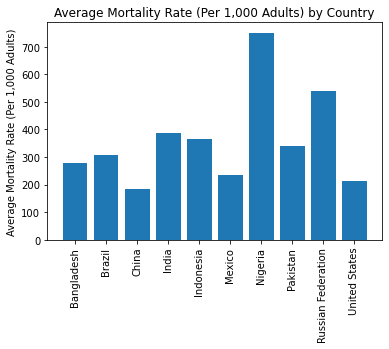

In [223]:
# Plot Average Mortality Rate by Country
x_values = sorted_urban_df["Country"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.bar(x_values,y_values)
plt.title ("Average Mortality Rate (Per 1,000 Adults) by Country")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.xticks(x_values,x_values, rotation=90)

# Save the figure
plt.savefig("output_figs/Mort_by_Country.png")

# Display the figure
plt.show()

#### Analysis:

Goal - To analyze the average mortality rates across the world's 10 largest countries.

Findings- Nigera and the Russian Federation had significantly larger mortality rates than the other 8 countries, beating the next highest by over 300 and 100 deaths per 1,000 adults, respectively.

Further Analysis- Further analysis could be done to determine if there were any significant events/diseases between 2006 and 2015 in these countries that could explain this significant difference.


-----------------

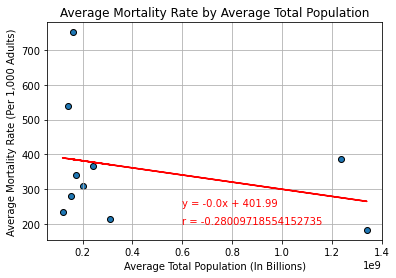

In [224]:
# Plot Average Mortality Rate by Average Total Population
x_values = sorted_urban_df["Average Total Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Total Population")
plt.xlabel ("Average Total Population (In Billions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(600000000,250),color="red")
plt.annotate(f'r = {rvalue}',(600000000, 200),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Avg_Total_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - To analyze changes in average mortality rate by average total population.

Findings- 

Further Analysis- Further analysis could be done to determine 


-----------------

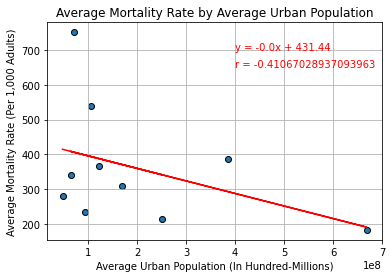

In [225]:
# Plot Average Mortality Rate by Average Urban Population
x_values = sorted_urban_df["Average Urban Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Urban Population")
plt.xlabel ("Average Urban Population (In Hundred-Millions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(400000000,700),color="red")
plt.annotate(f'r = {rvalue}',(400000000, 650),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Avg_Urban_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - To analyze changes in average mortality rate by average urban population.

Findings- 

Further Analysis- Further analysis could be done to determine 

-----------------

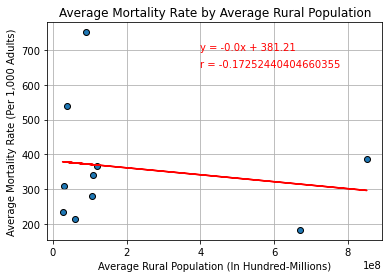

In [226]:
# Plot Average Mortality Rate by Average Rural Population
x_values = sorted_urban_df["Average Rural Population"]
y_values = sorted_urban_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Average Rural Population")
plt.xlabel ("Average Rural Population (In Hundred-Millions)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(400000000,700),color="red")
plt.annotate(f'r = {rvalue}',(400000000, 650),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Avg_Rural_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - To analyze changes in average mortality rate by average rural population.

Findings- 

Further Analysis- Further analysis could be done to determine 

-----------------

## Mortality Rate and Access to Physicians
--------

In [228]:
# Create dataframe to run visualization on
doctor_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Physicians (per 1,000 people)") |
(final_cleaned_df["Indicator Name"] == "Population, total")
,:]
doctor_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [229]:
# Create country column
countires =[]
countries = doctor_df["Country Name"].unique().astype(str)
sorted_doctor_df = pd.DataFrame(countries)
sorted_doctor_df=sorted_doctor_df.rename(columns = {0:"Country"})
sorted_doctor_df.index.name = "Index"
sorted_doctor_df.head(1)

,Country
Index,
0,Bangladesh


In [230]:
# Create mortality column
mort_rates = doctor_df.loc[doctor_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']

doctor_mort_rates_df = pd.DataFrame(mort_rates)
doctor_mort_rates_df = doctor_mort_rates_df.reset_index(drop=True)
doctor_mort_rates_df = doctor_mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
doctor_mort_rates_df.index.name = "Index"
doctor_mort_rates_df.head(1)

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889


In [231]:
# Create total population column
total_pop = doctor_df.loc[doctor_df["Indicator Name"] == "Population, total", '2006-2015 AVG']

doctor_total_pop_df = pd.DataFrame(total_pop)
doctor_total_pop_df = doctor_total_pop_df.reset_index(drop=True)
doctor_total_pop_df = doctor_total_pop_df.rename(columns = {"2006-2015 AVG":"Average Total Population"})
doctor_total_pop_df.index.name = "Index"
doctor_total_pop_df.head(1)

,Average Total Population
Index,
0,152710055.9


In [232]:
# Create Physician column
doctor_pop = doctor_df.loc[doctor_df["Indicator Name"] == "Physicians (per 1,000 people)", '2006-2015 AVG']

doctor_pop_df = pd.DataFrame(doctor_pop)
doctor_pop_df = doctor_pop_df.reset_index(drop=True)
doctor_pop_df = doctor_pop_df.rename(columns = {"2006-2015 AVG":"Physicians (per 1,000 people)"})
doctor_pop_df.index.name = "Index"
doctor_pop_df.head(1)

,"Physicians (per 1,000 people)"
Index,
0,0.31375


In [233]:
# Combine colums into sorted_doctor_df
sorted_doctor_df = pd.merge(sorted_doctor_df,doctor_mort_rates_df, on = "Index", how = "inner")
sorted_doctor_df = pd.merge(sorted_doctor_df,doctor_total_pop_df, on = "Index", how = "inner")
sorted_doctor_df = pd.merge(sorted_doctor_df,doctor_pop_df, on = "Index", how = "inner")
sorted_doctor_df

,Country,"Average Mortality Rate (Per 1,000 Adults)",Average Total Population,"Physicians (per 1,000 people)"
Index,,,,
0,Bangladesh,280.015889,1.527101e+08,0.313750
1,Brazil,308.089889,1.994672e+08,1.787143
2,China,182.676556,1.341022e+09,1.596000
3,India,386.059222,1.238089e+09,0.665143
4,Indonesia,367.283111,2.433133e+08,0.182600
5,Mexico,235.128000,1.193508e+08,1.953667
6,Nigeria,750.853444,1.620724e+08,0.395600
7,Pakistan,339.226111,1.722177e+08,0.803500
8,Russian Federation,539.344200,1.431818e+08,4.308950


In [234]:
# Find statistics for Physicians (per 1,000 people)
sorted_doctor_df.agg({"Physicians (per 1,000 people)":["mean","median","var","std","sem"]})

,"Physicians (per 1,000 people)"
mean,1.442502
median,1.199750
var,1.615900
std,1.271180
sem,0.401983


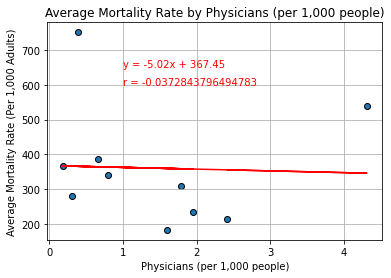

In [235]:
# Plot Average Mortality Rate by Physicians (per 1,000 people)
x_values = sorted_doctor_df["Physicians (per 1,000 people)"]
y_values = sorted_doctor_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Physicians (per 1,000 people)")
plt.xlabel ("Physicians (per 1,000 people)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1,650),color="red")
plt.annotate(f'r = {rvalue}',(1, 600),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Physicians_Total_Pop.png")

# Display the figure
plt.show()

#### Analysis:

Goal - To analyze changes in average mortality rate by Average Mortality Rate by Physicians (per 1,000 people)

Findings- 

Further Analysis- Further analysis could be done to determine 

-----------------

## Mortality Rate and Obesity
--------

In [237]:
# Create dataframe to run visualization on
overweight_df = final_cleaned_df.loc[(final_cleaned_df["Indicator Name"] == "Mortality Rate, Total") |
(final_cleaned_df["Indicator Name"] == "Prevalence of overweight (% of adults)") |
(final_cleaned_df["Indicator Name"] == "Prevalence of overweight, female (% of female adults)") |
(final_cleaned_df["Indicator Name"] == "Prevalence of overweight, male (% of male adults)")
,:]
overweight_df.head(1)

,Country Name,Indicator Name,2006-2015 AVG
0,Bangladesh,"Mortality Rate, Total",280.015889


In [238]:
# Create country column
countires =[]
countries = overweight_df["Country Name"].unique().astype(str)
sorted_overweight_df = pd.DataFrame(countries)
sorted_overweight_df=sorted_overweight_df.rename(columns = {0:"Country"})
sorted_overweight_df.index.name = "Index"
sorted_overweight_df.head(1)

,Country
Index,
0,Bangladesh


In [239]:
# Create mortality column
mort_rates = overweight_df.loc[overweight_df["Indicator Name"] == "Mortality Rate, Total", '2006-2015 AVG']
mort_rates_df = pd.DataFrame(mort_rates)
mort_rates_df = mort_rates_df.reset_index(drop=True)
mort_rates_df = mort_rates_df.rename(columns = {"2006-2015 AVG":"Average Mortality Rate (Per 1,000 Adults)"})
mort_rates_df.index.name = "Index"
mort_rates_df.head(1)

,"Average Mortality Rate (Per 1,000 Adults)"
Index,
0,280.015889


In [240]:
# Create prevelance of overweight (% of adults) column
tot_overweight = overweight_df.loc[overweight_df["Indicator Name"] == "Prevalence of overweight (% of adults)", '2006-2015 AVG']
tot_overweight_df = pd.DataFrame(tot_overweight)
tot_overweight_df = tot_overweight_df.reset_index(drop=True)
tot_overweight_df = tot_overweight_df.rename(columns = {"2006-2015 AVG":"Prevalence of overweight (% of adults)"})
tot_overweight_df.index.name = "Index"
tot_overweight_df.head(1)

,Prevalence of overweight (% of adults)
Index,
0,17.1


In [241]:
# Create prevalence of overweight, female (% of female adults) column
fem_overweight = overweight_df.loc[overweight_df["Indicator Name"] == "Prevalence of overweight, female (% of female adults)", '2006-2015 AVG']
fem_overweight_df = pd.DataFrame(fem_overweight)
fem_overweight_df = fem_overweight_df.reset_index(drop=True)
fem_overweight_df = fem_overweight_df.rename(columns = {"2006-2015 AVG":"Prevalence of overweight, female (% of female adults)"})
fem_overweight_df.index.name = "Index"
fem_overweight_df.head(1)

,"Prevalence of overweight, female (% of female adults)"
Index,
0,20.05


In [242]:
# Create prevalence of overweight, female (% of male adults) column
male_overweight = overweight_df.loc[overweight_df["Indicator Name"] == "Prevalence of overweight, male (% of male adults)", '2006-2015 AVG']
male_overweight_df = pd.DataFrame(male_overweight)
male_overweight_df = male_overweight_df.reset_index(drop=True)
male_overweight_df = male_overweight_df.rename(columns = {"2006-2015 AVG":"Prevalence of overweight, male (% of male adults)"})
male_overweight_df.index.name = "Index"
male_overweight_df.head(1)

,"Prevalence of overweight, male (% of male adults)"
Index,
0,14.25


In [243]:
# Combine colums into sorted_overweight_df
sorted_overweight_df = pd.merge(sorted_overweight_df,mort_rates_df, on = "Index", how = "inner")
sorted_overweight_df = pd.merge(sorted_overweight_df,tot_overweight_df, on = "Index", how = "inner")
sorted_overweight_df = pd.merge(sorted_overweight_df,fem_overweight_df, on = "Index", how = "inner")
sorted_overweight_df = pd.merge(sorted_overweight_df,male_overweight_df, on = "Index", how = "inner")
sorted_overweight_df

,Country,"Average Mortality Rate (Per 1,000 Adults)",Prevalence of overweight (% of adults),"Prevalence of overweight, female (% of female adults)","Prevalence of overweight, male (% of male adults)"
Index,,,,,
0,Bangladesh,280.015889,17.10,20.05,14.25
1,Brazil,308.089889,52.60,51.55,53.75
2,China,182.676556,32.25,30.70,33.65
3,India,386.059222,20.85,23.50,18.40
4,Indonesia,367.283111,22.85,26.80,18.95
5,Mexico,235.128000,63.25,64.60,61.75
6,Nigeria,750.853444,31.55,38.85,24.50
7,Pakistan,339.226111,22.10,24.30,20.00
8,Russian Federation,539.344200,57.55,56.20,59.05


In [244]:
# Find statistics for Prevalence of overweight (% of adults)
sorted_overweight_df.agg({"Prevalence of overweight (% of adults)":["mean","median","var","std","sem"]})

,Prevalence of overweight (% of adults)
mean,38.650000
median,31.900000
var,369.243333
std,19.215705
sem,6.076540


In [245]:
# Find statistics for Prevalence of overweight, female (% of female adults)
sorted_overweight_df.agg({"Prevalence of overweight, female (% of female adults)":["mean","median","var","std","sem"]})

,"Prevalence of overweight, female (% of female adults)"
mean,39.825000
median,34.775000
var,294.486806
std,17.160618
sem,5.426664


In [246]:
# Find statistics for Prevalence of overweight, female (% of female adults)
sorted_overweight_df.agg({"Prevalence of overweight, male (% of male adults)":["mean","median","var","std","sem"]})

,"Prevalence of overweight, male (% of male adults)"
mean,37.550000
median,29.075000
var,465.748889
std,21.581216
sem,6.824580


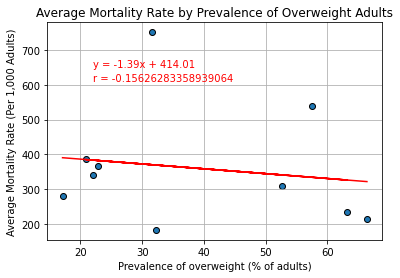

In [247]:
# Plot Average Mortality Rate by Prevalence of Overweight Adults
x_values = sorted_overweight_df["Prevalence of overweight (% of adults)"]
y_values = sorted_overweight_df["Average Mortality Rate (Per 1,000 Adults)"]
plt.scatter(x_values,y_values, edgecolors="k")
plt.title ("Average Mortality Rate by Prevalence of Overweight Adults")
plt.xlabel ("Prevalence of overweight (% of adults)")
plt.ylabel ("Average Mortality Rate (Per 1,000 Adults)")
plt.grid()

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r")

# Annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(22,650),color="red")
plt.annotate(f'r = {rvalue}',(22,610),color="r")

# Save the figure
plt.savefig("output_figs/Mort_by_Overweight_Adults.png")

# Display the figure
plt.show()

#### Analysis:

Goal - To analyze changes in average mortality rate by Prevalence of Overweight Adults.

Findings- 

Further Analysis- Further analysis could be done to determine 

-----------------

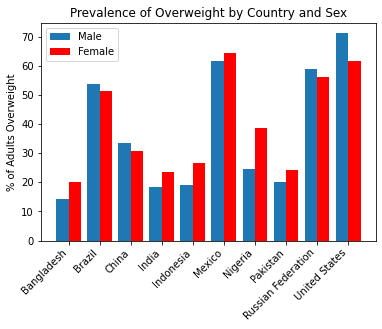

In [248]:
# Plot bar graph of overweight % by sex by country
x_values = sorted_overweight_df["Country"]
y1_values = sorted_overweight_df["Prevalence of overweight, male (% of male adults)"]
y2_values = sorted_overweight_df["Prevalence of overweight, female (% of female adults)"]
 
X_axis = np.arange(len(x_values))
 
plt.bar(X_axis - 0.2, y1_values, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, y2_values, 0.4, label = 'Female', color="r")
 
plt.xticks(X_axis, x_values,rotation=45, ha="right", va="top")
plt.ylabel("% of Adults Overweight")
plt.title("Prevalence of Overweight by Country and Sex")

plt.legend()

# Save the figure
plt.savefig("output_figs/Overweight_%_by_Sex_by_Country.png")

# Display the figure
plt.show()


#### Analysis:

Goal - To analyze prevalence of overweight adults by sex by country.

Findings- 

Further Analysis- Further analysis could be done to determine 

-----------------

### Proposal:

1. To analyze the correlation of different health and societal 
makeup measurements across the world's largest countries with mortality rates 
to see which has the strongest impact. 
2. We plan to determine if there is a
significant difference across the 10 largest nations between mortality rates of
males and females. 
3. We plan to also determine and plot correlation between
mortality rates and national obesity, 
4. physicians per 1000 people, 
5. and national
population size. 

### Hypotheses:

1. We hypothesize that females have a lower mortality rate than males,
2. that obesity is strongly correlated with mortality rate, 
3. that physicians per citizens
is strongly negatively correlated with mortality rate, 
4. and that larger nations have
higher mortality rates.

### Issues We Had: